# Data Task Force


## Initialization and Setup

In [5]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [7]:
df = pd.read_csv('C:\\Users\\scott\\OneDrive\\Desktop\\movies.csv\\movies.csv')

pd.set_option('display.max_columns', None) # show all columns 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
# see the headers/column names 
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [9]:
# see the column's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## Aggregate Features 

##### In this section we will add several columns to our dataset. These new columns will be calculated/generated based of the existing columns because we believe we can use the information better


### Season Released Column

In [10]:
""" create a released seasons column. This column maps the released column, which is a date, to a new column 
    corresponding to the season the movie was released 
"""

# Function to map month to season
def map_month_to_season(month):
    month_to_season = {
        'January': 'winter',
        'February': 'winter',
        'March': 'spring',
        'April': 'spring',
        'May': 'spring',
        'June': 'summer',
        'July': 'summer',
        'August': 'summer',
        'September': 'autumn',
        'October': 'autumn',
        'November': 'autumn',
        'December': 'winter'
    }
    return month_to_season.get(month, 'unknown')

# Extract the month from the "released" column
df['month_released'] = df['released'].str.split(' ').str[0]

# Create the "season_released" column, map the month to a season
df['season_released'] = df['month_released'].apply(map_month_to_season)

# Drop the temporary "month_released" column
df = df.drop(columns=['month_released'])

# Display the DataFrame
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,season_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,summer
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,summer
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,summer
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,summer
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,summer


### Profit ( Gross Income - Budget ) Column 

In [11]:
df['profit'] = (df['gross'] - df['budget'])


df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,season_released,profit
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,summer,27998772.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,summer,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,summer,520375067.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,summer,79953539.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,summer,33846344.0


### Covid flag Column ( If a movie was released during covid )

In [12]:
start_year = 2020
end_year = 2024

df['covid_year'] = df['year'].apply(lambda x: start_year <= x <= end_year if pd.notnull(x) else False)

# Convert the boolean values to a more readable format
df['covid_year'] = df['covid_year'].map({True: 'Yes', False: 'No'})
df['covid_year'] = df['covid_year'].fillna(False)

## Data Quality Report

This gives detailed informataion about our features and splits them into categorical and continuous features


In [13]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

continuous_features = df.select_dtypes(include=['Int64','float'])
categorical_features = df.select_dtypes(include='object')

def identify_missing_values(data):
    if data.dtypes.any() in ['int64', 'float64']:
        missing_values_count = data.isnull().sum()
    
    else:
        missing_values_count = data.isnull().sum() + (data == ' ').sum() + (data == 'NaN').sum()
    return missing_values_count


def continuous_data_report(data, description_data):
    missing_values_count = identify_missing_values(data)

    report = pd.DataFrame({
        'Feature': data.columns,
        'Count': data.count(),
        '% of Missing': missing_values_count / len(data) * 100, 
        'Count of ?': missing_values_count,
        'Card.': data.nunique(),
        'Min.': data.min(),
        'Q1': data.quantile(0.25),
        'Median': data.median(),
        'Q3': data.quantile(0.75),
        'Max.': data.max(),
        'Mean': data.mean().round(2),
        'Std. Dev.': data.std(),
    })
    report['% of Missing'] = report['% of Missing'].astype(str).astype(float).round(2).astype(str)
    report['Max.'] = report['Max.'].astype(str).astype(float).round(2).astype(str)
    report['Std. Dev.'] = report['Std. Dev.'].astype(str).astype(float).round(2).astype(str)
    
    return report


def categorical_data_report(data, description_data):
    missing_values_count = identify_missing_values(data)

    data_str = data.applymap(str)

    mode = data_str.mode().iloc[0]
    mode_freq = data_str[data_str == mode].count()
    mode_perc = (mode_freq / len(data_str)) * 100

    value_counts = data_str.value_counts()
    
    

    if len(value_counts) > 1:
        mode = value_counts.index[0]
        mode_freq = value_counts.iloc[0]
        mode_perc = (mode_freq / len(data_str)) * 100

        data_without_mode = data_str[data_str != mode]
        
        second_mode = data_without_mode.mode().iloc[0]
        second_mode_freq = data_without_mode[data_without_mode == second_mode].count()
        second_mode_perc = (second_mode_freq / len(data_without_mode)) * 100
        
    else:
        mode = None
        mode_freq = None
        mode_perc = None
        second_mode = None
        second_mode_freq = None
        second_mode_perc = None

    report = pd.DataFrame({
        'Feature': data.columns,
        'Count': len(data_str),
        '% of Missing': missing_values_count / len(data_str) * 100, 
        'Count of ?': missing_values_count,     
        'Card.': data_str.nunique(),
        'Mode': mode,
        'Mode Freq.': mode_freq,
        'Mode %': mode_perc,
        '2nd Mode': second_mode,
        '2nd Mode Freq.': second_mode_freq,
        '2nd Mode Perc': second_mode_perc,
    })
    report['2nd Mode Perc'] = report['2nd Mode Perc'].astype(str).astype(float).round(5).astype(str)
    report['% of Missing'] = report['% of Missing'].astype(str).astype(float).round(2).astype(str)
    return report

missing_continuous_values = identify_missing_values(continuous_features)
missing_categorical_values = identify_missing_values(categorical_features)

continuous_report = continuous_data_report(continuous_features, df)
categorical_report = categorical_data_report(categorical_features, df)

print("Continuous Features Data Quality Report:")
continuous_report.sort_values(by='% of Missing', ascending=False)

Continuous Features Data Quality Report:


C:\Users\scott\AppData\Local\Temp\ipykernel_3716\2023415672.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_str = data.applymap(str)


,Feature,Count,% of Missing,Count of ?,Card.,Min.,Q1,Median,Q3,Max.,Mean,Std. Dev.
profit,profit,5436,29.11,2232,5436,-158031147.0,-3177509.0,13766118.0,70175840.5,2610246203.0,67065820.50,158818096.74
budget,budget,5497,28.31,2171,413,3000.0,10000000.0,20500000.0,45000000.0,356000000.0,35589876.19,41457296.6
gross,gross,7479,2.46,189,7472,309.0,4532055.5,20205757.0,76016691.5,2847246203.0,78500541.02,165725124.32
runtime,runtime,7664,0.05,4,138,55.0,95.0,104.0,116.0,366.0,107.26,18.58
score,score,7665,0.04,3,72,1.9,5.8,6.5,7.1,9.3,6.39,0.97
votes,votes,7665,0.04,3,936,7.0,9100.0,33000.0,93000.0,2400000.0,88108.50,163323.76
year,year,7668,0.0,0,41,1980.0,1991.0,2000.0,2010.0,2020.0,2000.41,11.15


In [14]:
print("\nCategorical Features Data Quality Report:")
categorical_report.sort_values(by='% of Missing', ascending=False)


Categorical Features Data Quality Report:


,Feature,Count,% of Missing,Count of ?,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode Perc
rating,rating,7668,1.0,77,13,R,1,0.013041,PG-13,2112,27.54304
company,company,7668,0.22,17,2386,Film 4,1,0.013041,Universal Pictures,377,4.91654
writer,writer,7668,0.04,3,4536,Gregory Burke,1,0.013041,Woody Allen,37,0.48252
country,country,7668,0.04,3,60,United Kingdom,1,0.013041,United States,5475,71.40063
released,released,7668,0.03,2,3415,"October 10, 2014 (United Kingdom)",1,0.013041,"February 14, 1986 (United States)",9,0.11737
star,star,7668,0.01,1,2815,Jack O'Connell,1,0.013041,Nicolas Cage,43,0.56077
name,name,7668,0.0,0,7512,'71,1,0.013041,Anna,3,0.03912
genre,genre,7668,0.0,0,19,Action,1,0.013041,Comedy,2245,29.27752
director,director,7668,0.0,0,2949,Yann Demange,1,0.013041,Woody Allen,38,0.49557
season_released,season_released,7668,0.0,0,5,autumn,1,0.013041,spring,1912,24.93479


In [15]:
pd.reset_option('all')


C:\Users\scott\AppData\Local\Temp\ipykernel_3716\1012653977.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
C:\Users\scott\AppData\Local\Temp\ipykernel_3716\1012653977.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


## Charts ( Histograms and Barcharts )

C:\Users\scott\AppData\Local\Temp\ipykernel_3716\964287045.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature = col_list[i]


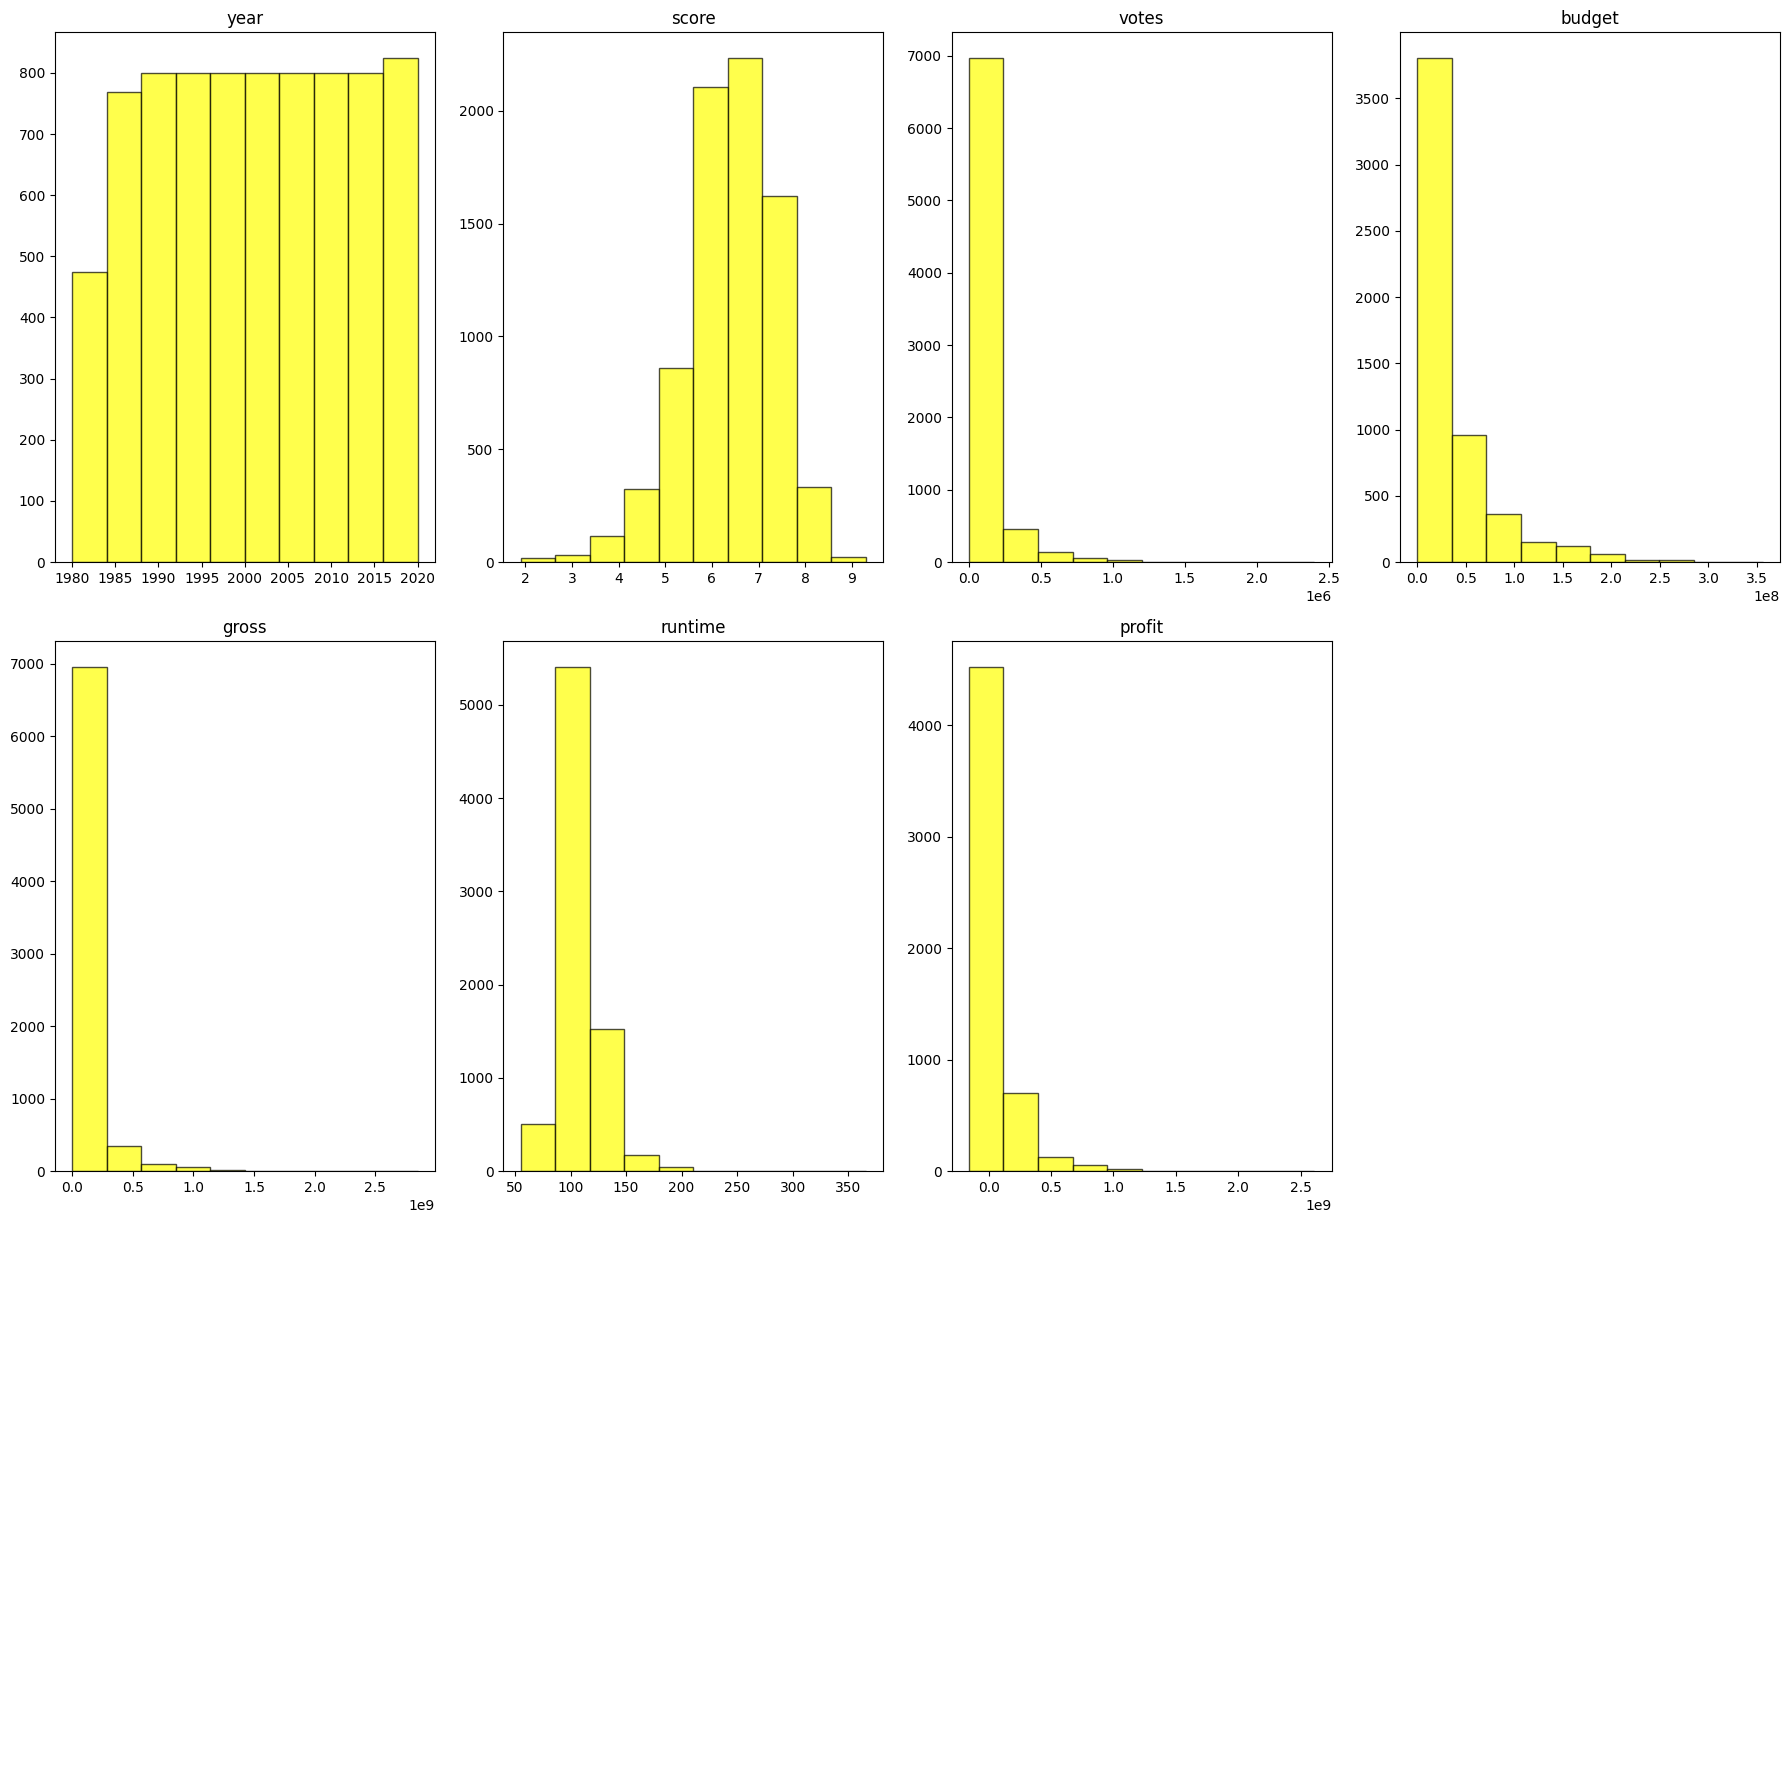

In [16]:
col_list = continuous_report['Feature']

num_plots = len(col_list)
num_rows = 3
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(18, 18))

for i in range(min(num_plots, num_rows * num_cols)):
    row_idx = i // num_cols
    col_idx = i % num_cols
    feature = col_list[i]
    
    
    ax[row_idx, col_idx].hist(continuous_features[feature], bins=10, alpha=0.7, color='yellow', edgecolor='black')  
    
    ax[row_idx, col_idx].set_title(feature)

for i in range(num_plots, num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax[row_idx, col_idx].axis('off')

plt.tight_layout()
plt.show()


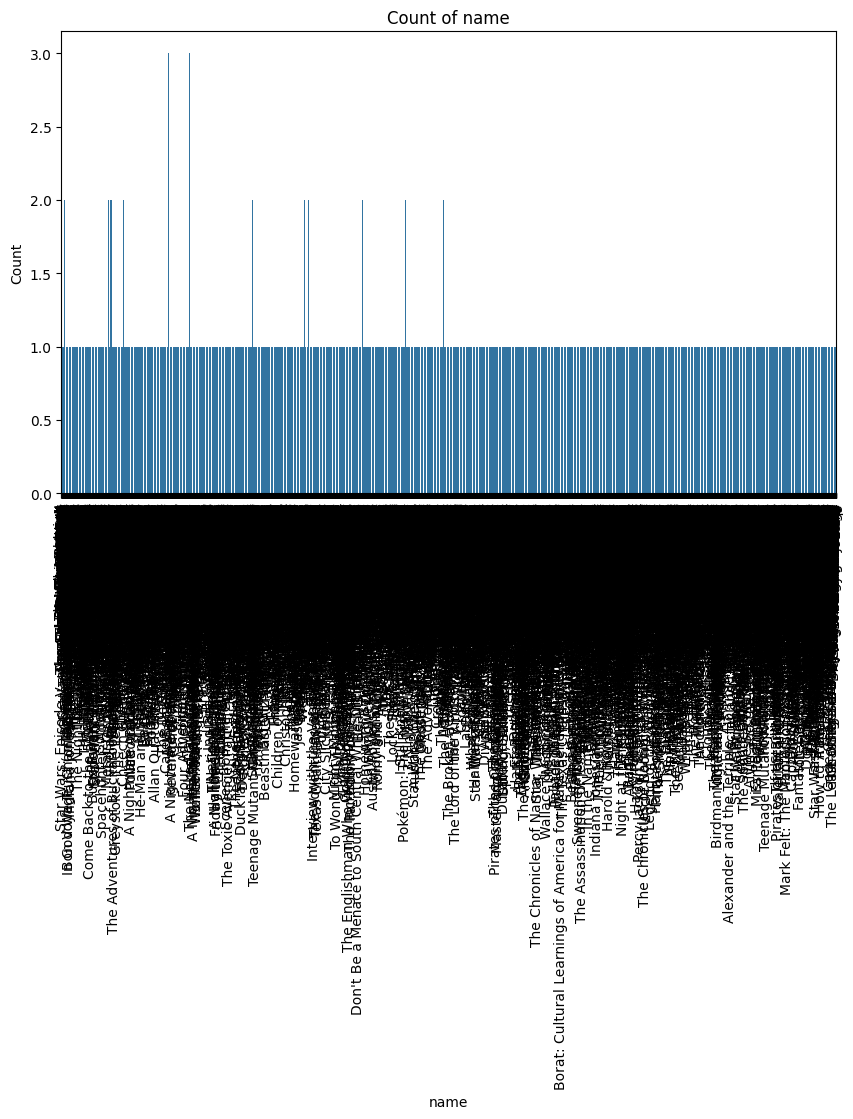

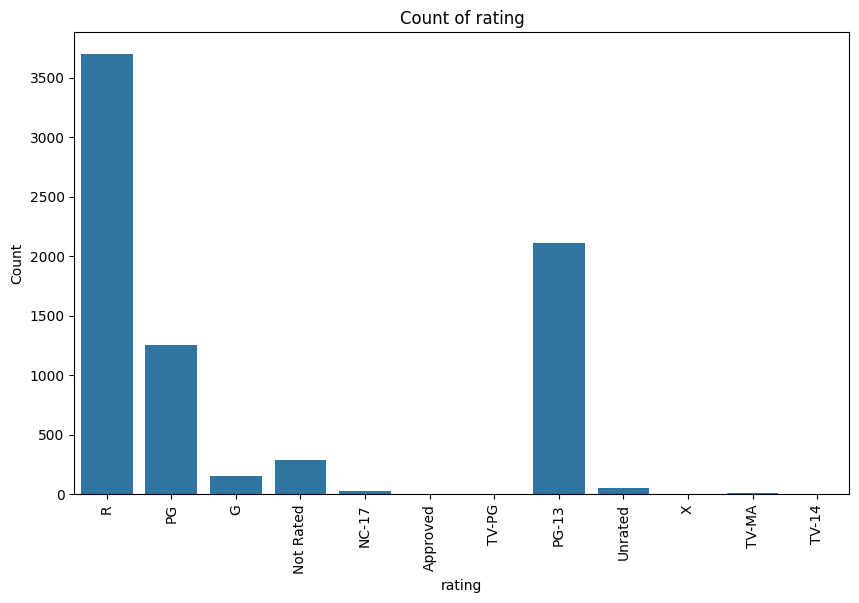

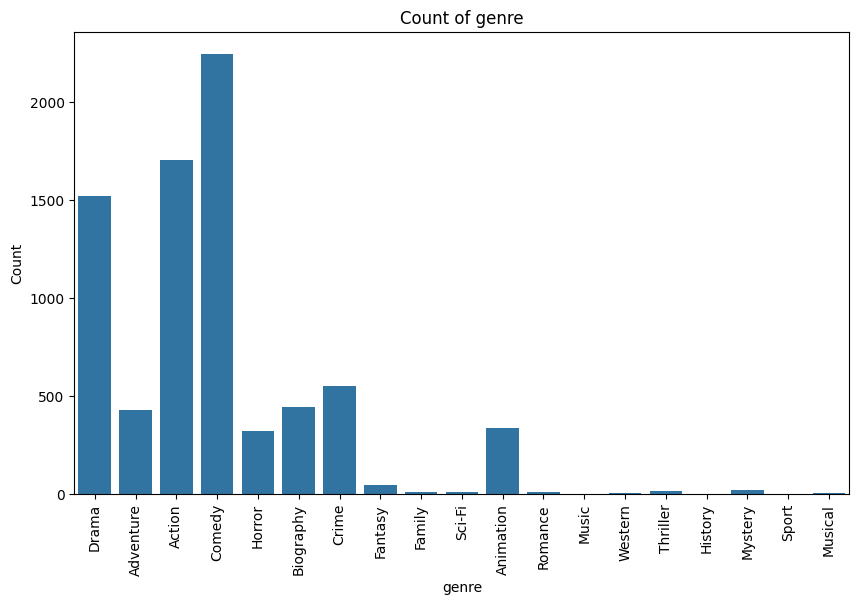

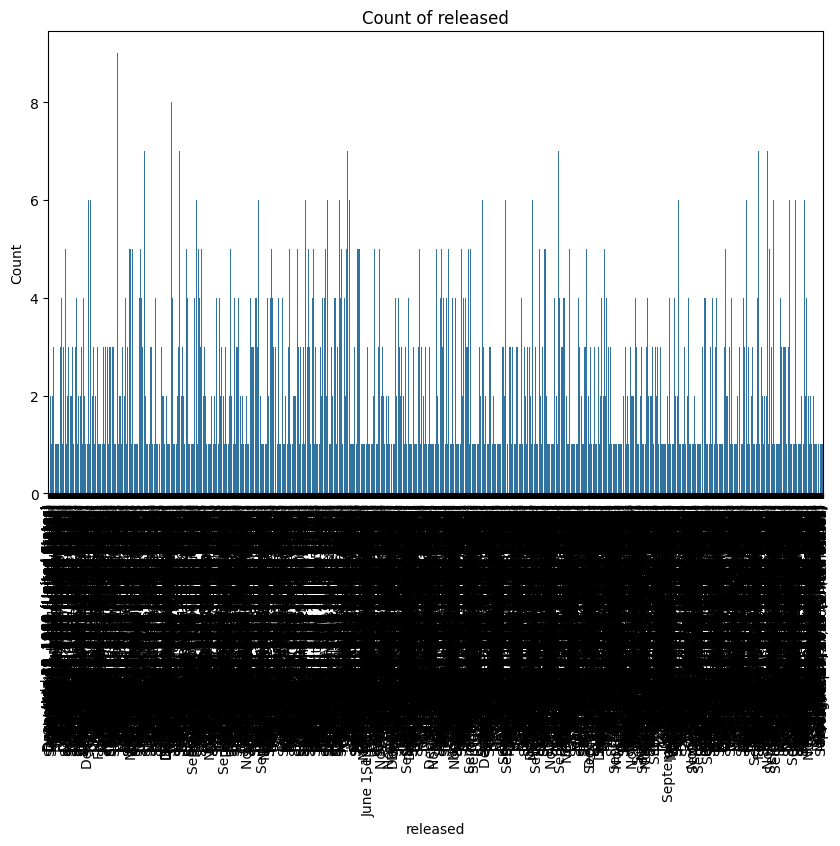

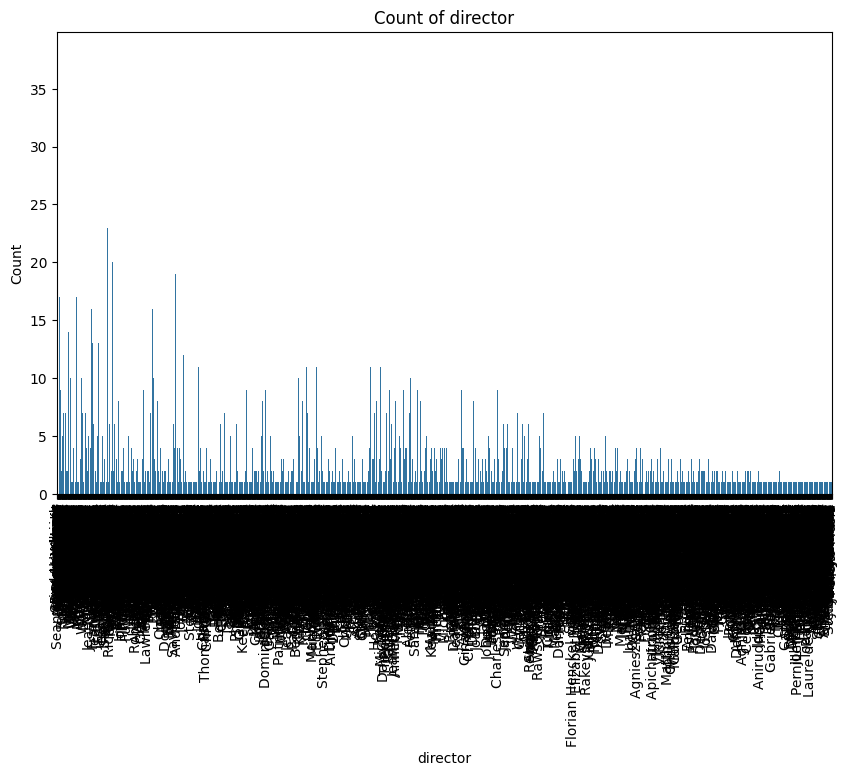

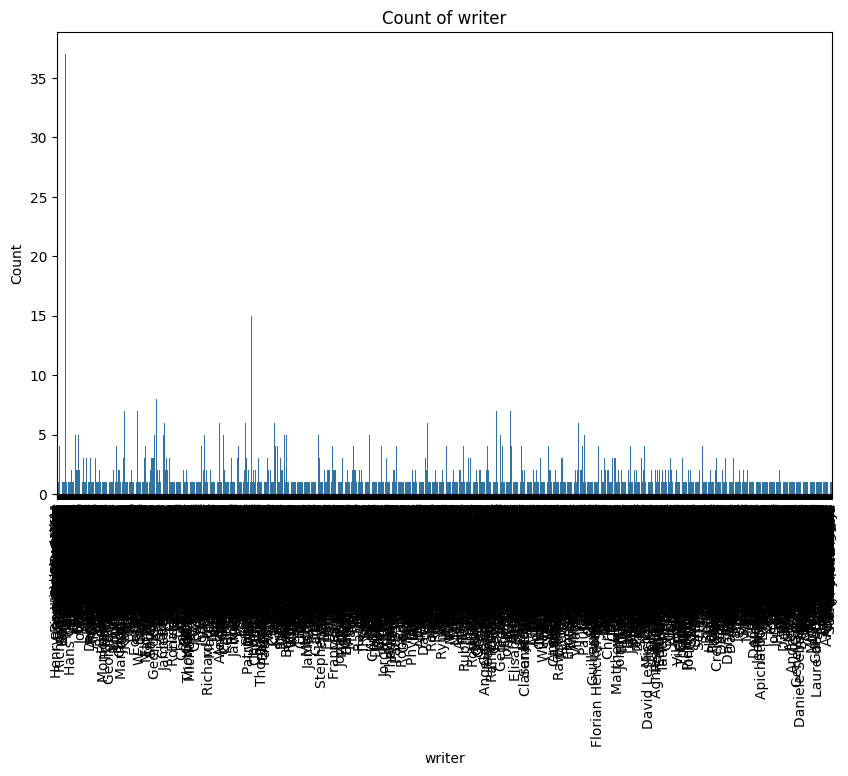

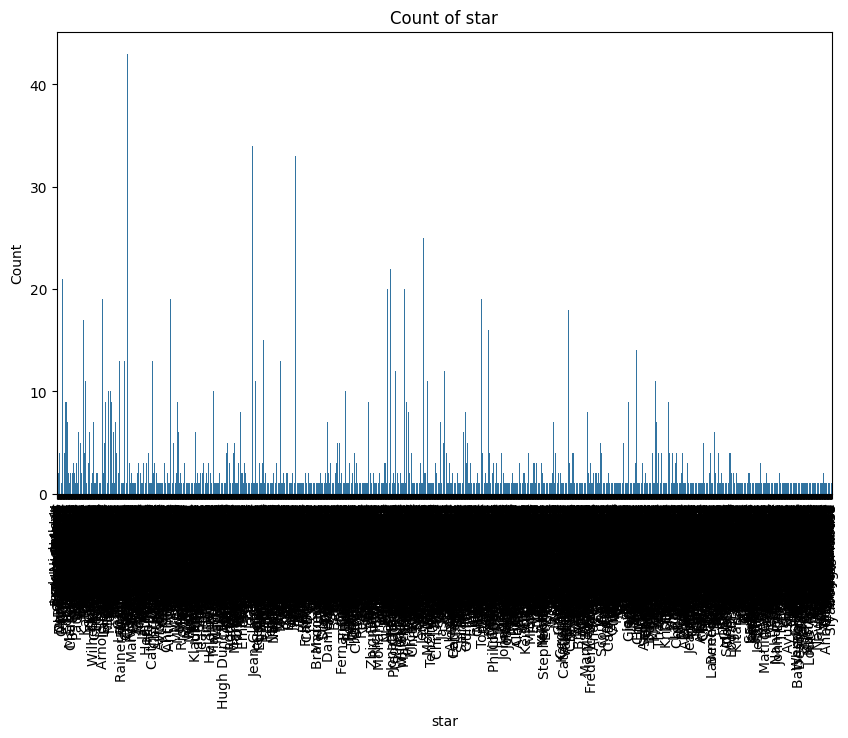

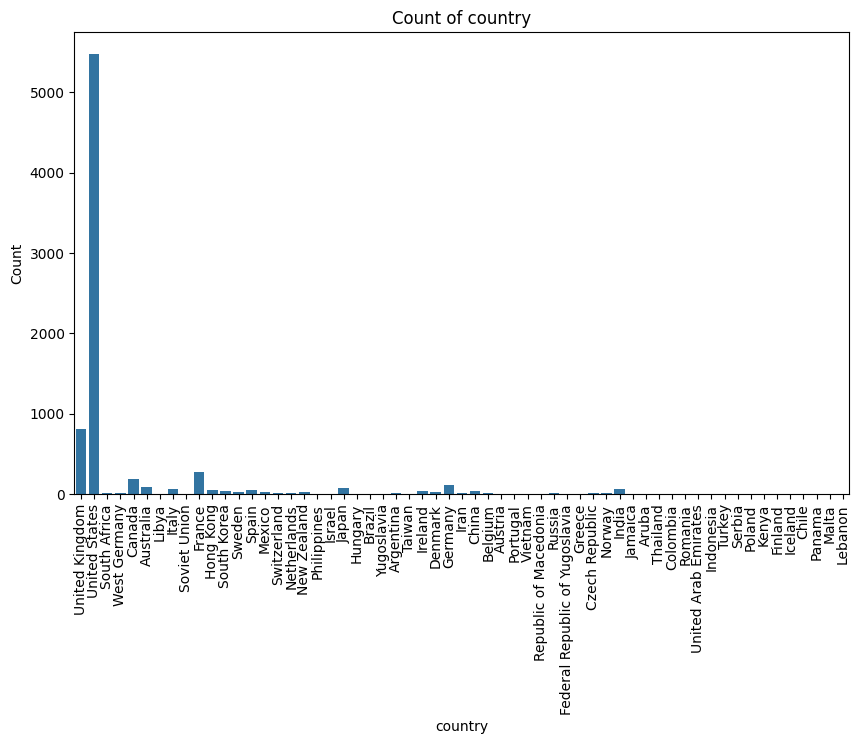

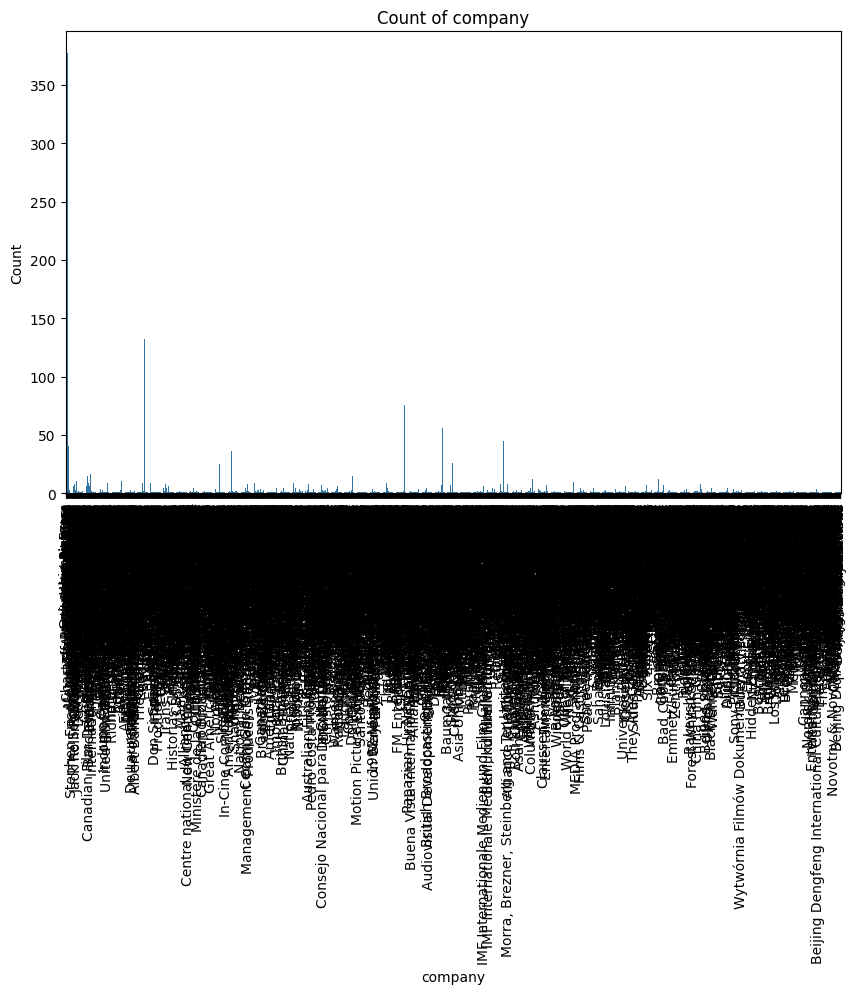

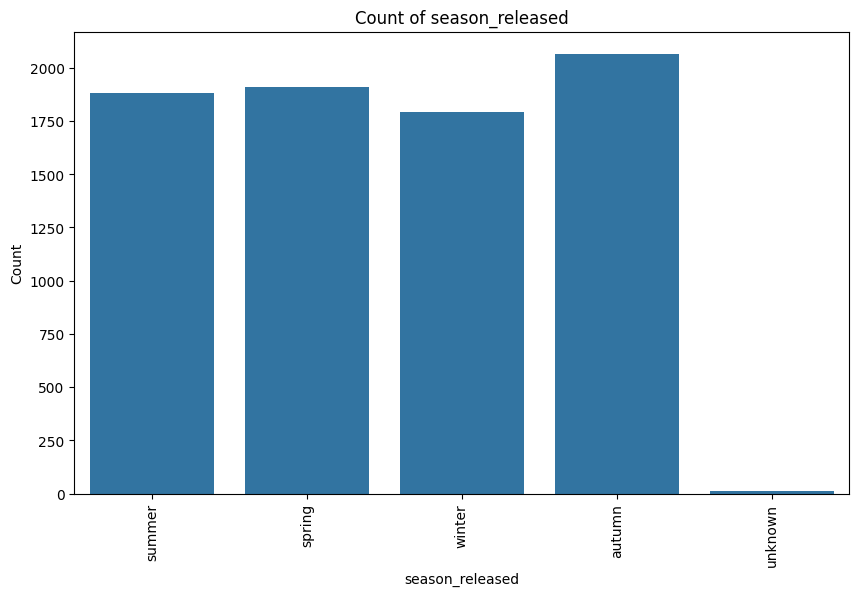

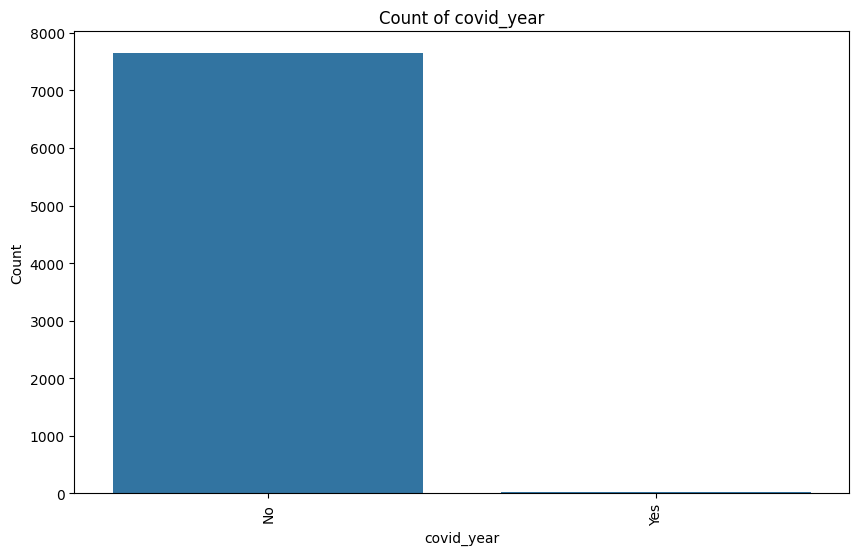

In [17]:
for feature in categorical_features.columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=feature, data=categorical_features)
    ax.tick_params(axis='x', labelrotation=90)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

## Missing Values and Outliers

##### For each continuous feature, identify the outliers using the IQR method

In [18]:
# your code goes here
# Calculate Q1, Q3, and IQR
Q1 = continuous_features.quantile(0.25)
Q3 = continuous_features.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 -  1.5 * IQR
upper_bound = Q3 +  1.5 * IQR

# Identify outliers
outliers = continuous_features[(continuous_features < lower_bound) | (continuous_features > upper_bound)]

# Report the number of outliers
print("Number of outliers:")
print(outliers.count())

df._get_numeric_data()

Number of outliers:
year         0
score      119
votes      803
budget     445
gross      851
runtime    240
profit     591
dtype: int64


,year,score,votes,budget,gross,runtime,profit
0,1980,8.4,927000.0,19000000.0,46998772.0,146.0,27998772.0
1,1980,5.8,65000.0,4500000.0,58853106.0,104.0,54353106.0
2,1980,8.7,1200000.0,18000000.0,538375067.0,124.0,520375067.0
3,1980,7.7,221000.0,3500000.0,83453539.0,88.0,79953539.0
4,1980,7.3,108000.0,6000000.0,39846344.0,98.0,33846344.0
...,...,...,...,...,...,...,...
7663,2020,3.1,18.0,7000.0,NaN,90.0,NaN
7664,2020,4.7,36.0,NaN,NaN,90.0,NaN
7665,2020,5.7,29.0,58750.0,NaN,NaN,NaN
7666,2020,NaN,NaN,15000.0,NaN,120.0,NaN


##### Replace the outlier values with upper bounds and lower bounds 

In [19]:
# Initialize a dictionary to store the number of updated cells for each column
updated_cells = {col:  0 for col in continuous_features.columns}

for column in continuous_features.columns:
    # Calculate Q1, Q3, and IQR
    Q1 = continuous_features[column].quantile(0.25)
    Q3 = continuous_features[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 -  1.5 * IQR
    upper_bound = Q3 +  1.5 * IQR
    
    # Identify outliers
    outliers = continuous_features[column][(continuous_features[column] < lower_bound) | (continuous_features[column] > upper_bound)]
    
    # Count the number of outliers
    updated_cells[column] = len(outliers)

    # Apply the clamping method to replace outliers
    continuous_features[column] = continuous_features[column].clip(lower=lower_bound, upper=upper_bound)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Report the number of updated cells for each column
for column, count in updated_cells.items():
    print(f"Number of updated cells in {column}: {count}")

# Display the updated DataFrame
df._get_numeric_data()

Number of updated cells in year: 0
Number of updated cells in score: 119
Number of updated cells in votes: 803
Number of updated cells in budget: 445
Number of updated cells in gross: 851
Number of updated cells in runtime: 240
Number of updated cells in profit: 591


,year,score,votes,budget,gross,runtime,profit
0,1980,8.40,218850.0,19000000.0,46998772.0,146.0,2.799877e+07
1,1980,5.80,65000.0,4500000.0,58853106.0,104.0,5.435311e+07
2,1980,8.70,218850.0,18000000.0,183243645.5,124.0,1.802059e+08
3,1980,7.70,218850.0,3500000.0,83453539.0,88.0,7.995354e+07
4,1980,7.30,108000.0,6000000.0,39846344.0,98.0,3.384634e+07
...,...,...,...,...,...,...,...
7663,2020,3.85,18.0,7000.0,NaN,90.0,NaN
7664,2020,4.70,36.0,NaN,NaN,90.0,NaN
7665,2020,5.70,29.0,58750.0,NaN,NaN,NaN
7666,2020,NaN,NaN,15000.0,NaN,120.0,NaN


##### For each continuous feature, identify the <b> missing values </b> & replace them with the mean

In [20]:
print(continuous_report['% of Missing'])
print() 

# As seen from the printed result from the above, there is no column with more than 50% missing values so we can input the mean
for column in continuous_features.columns:
    df[column].fillna(df[column].mean(), inplace=True)

df._get_numeric_data()

year         0.0
score       0.04
votes       0.04
budget     28.31
gross       2.46
runtime     0.05
profit     29.11
Name: % of Missing, dtype: object



C:\Users\scott\AppData\Local\Temp\ipykernel_3716\1327670377.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,year,score,votes,budget,gross,runtime,profit
0,1980,8.400000,218850.000000,1.900000e+07,4.699877e+07,146.000000,2.799877e+07
1,1980,5.800000,65000.000000,4.500000e+06,5.885311e+07,104.000000,5.435311e+07
2,1980,8.700000,218850.000000,1.800000e+07,1.832436e+08,124.000000,1.802059e+08
3,1980,7.700000,218850.000000,3.500000e+06,8.345354e+07,88.000000,7.995354e+07
4,1980,7.300000,108000.000000,6.000000e+06,3.984634e+07,98.000000,3.384634e+07
...,...,...,...,...,...,...,...
7663,2020,3.850000,18.000000,7.000000e+03,5.068799e+07,90.000000,4.179167e+07
7664,2020,4.700000,36.000000,3.147767e+07,5.068799e+07,90.000000,4.179167e+07
7665,2020,5.700000,29.000000,5.875000e+04,5.068799e+07,106.612213,4.179167e+07
7666,2020,6.399172,63480.526941,1.500000e+04,5.068799e+07,120.000000,4.179167e+07


##### For each categorical feature, identify the <b> missing values </b> & replace them with the mode of the category

In [21]:
df.select_dtypes(exclude=[np.number])

,name,rating,genre,released,director,writer,star,country,company,season_released,covid_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,summer,No
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,summer,No
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,summer,No
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,summer,No
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,summer,No
...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,"October 23, 2020 (United States)",Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,NaN,autumn,Yes
7664,Dream Round,NaN,Comedy,"February 7, 2020 (United States)",Dusty Dukatz,Lisa Huston,Michael Saquella,United States,Cactus Blue Entertainment,winter,Yes
7665,Saving Mbango,NaN,Drama,"April 27, 2020 (Cameroon)",Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,Embi Productions,spring,Yes
7666,It's Just Us,NaN,Drama,"October 1, 2020 (United States)",James Randall,James Randall,Christina Roz,United States,NaN,autumn,Yes


In [22]:
print(categorical_report['% of Missing'])
print() 

# As seen from the printed result from the above, there is no column with more than 50% missing values so we can input the mean
for column in categorical_features.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

df.select_dtypes(exclude=[np.number])

name                0.0
rating              1.0
genre               0.0
released           0.03
director            0.0
writer             0.04
star               0.01
country            0.04
company            0.22
season_released     0.0
covid_year          0.0
Name: % of Missing, dtype: object



C:\Users\scott\AppData\Local\Temp\ipykernel_3716\1287020584.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


,name,rating,genre,released,director,writer,star,country,company,season_released,covid_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,Warner Bros.,summer,No
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,Columbia Pictures,summer,No
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,Lucasfilm,summer,No
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",Jim Abrahams,Jim Abrahams,Robert Hays,United States,Paramount Pictures,summer,No
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,Orion Pictures,summer,No
...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,R,Drama,"October 23, 2020 (United States)",Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,Universal Pictures,autumn,Yes
7664,Dream Round,R,Comedy,"February 7, 2020 (United States)",Dusty Dukatz,Lisa Huston,Michael Saquella,United States,Cactus Blue Entertainment,winter,Yes
7665,Saving Mbango,R,Drama,"April 27, 2020 (Cameroon)",Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,Embi Productions,spring,Yes
7666,It's Just Us,R,Drama,"October 1, 2020 (United States)",James Randall,James Randall,Christina Roz,United States,Universal Pictures,autumn,Yes


## Normalization

##### normalize the data using minmax normalization 

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
for column in continuous_features.columns: 
    scaler = MinMaxScaler()

    scaler.fit(df[[column]])

    df[column] = scaler.transform(df[[column]])

df.head()

# notice all continuous values are between 0 and 1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,season_released,profit,covid_year
0,The Shining,R,Drama,0.0,"June 13, 1980 (United States)",0.875000,1.000000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,0.194847,0.256481,Warner Bros.,0.982143,summer,0.481254,No
1,The Blue Lagoon,R,Adventure,0.0,"July 2, 1980 (United States)",0.375000,0.296985,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,0.046124,0.321173,Columbia Pictures,0.482143,summer,0.571074,No
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,0.0,"June 20, 1980 (United States)",0.932692,1.000000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,0.184590,1.000000,Lucasfilm,0.720238,summer,1.000000,No
3,Airplane!,PG,Comedy,0.0,"July 2, 1980 (United States)",0.740385,1.000000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,0.035868,0.455423,Paramount Pictures,0.291667,summer,0.658324,No
4,Caddyshack,R,Comedy,0.0,"July 25, 1980 (United States)",0.663462,0.493472,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,0.061510,0.217449,Orion Pictures,0.410714,summer,0.501183,No


# Project Implementations 

## Building Various Models of datasets

### Naive-Bayes Model

In [25]:
# Import necessary libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

### Define the functions to be used for <i><b>BONUS QUESTIONS</b></i>

In [26]:
def feature_selection_by_correlation(df, target_column, num_features=10):
    """
    Selects the top num_features features based on their correlation with the target_column.
    """
    correlation_matrix = df.corr().abs()
    target_correlation = correlation_matrix[target_column]
    features_ranked_by_correlation = target_correlation.sort_values(ascending=False)
    selected_features = features_ranked_by_correlation[1:num_features+1].index #add 1 to skip target feature
    return selected_features

def hyper_parameter_optimization(X, y, model, param_grid):
    """
    Performs hyper-parameter optimization using GridSearchCV.
    """
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    grid_search.fit(X, y)
    return grid_search.best_params_

def train_model(X, y, model, params):
    """
    Trains the model with the given parameters.
    """
    model.set_params(**params)
    model.fit(X, y)
    return model

#### encode the Categorical descriptive features and target variable

In [27]:
# Select relevant features
features = ['rating', 'genre', 'year', 'released', 'score', 'director', 'star', 'country', 'budget', 'gross', 'company', 'runtime', 'profit', 'covid_year']
target = 'season_released'
# use these columns for now
# ['name', 'votes', 'writer'] columns aren't used because they might not be useful. 'writer is not used becase it has too little unique values 
print( "writer uniqueness =", len(df['writer'].unique())/len(df['writer'])) 

# Encode categorical features
encoder = OrdinalEncoder()
df[features] = encoder.fit_transform(df[features])

# Encode the target feature 
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

writer uniqueness = 0.5914188836724048


#### Feature Selection using Algorithm

In [28]:
# update relevant features
concatenated_df = pd.concat([df[features], df[target]], axis=1) #add the target column back
features = feature_selection_by_correlation(concatenated_df, 'season_released', num_features=10)
features

Index(['released', 'gross', 'runtime', 'budget', 'profit', 'genre', 'star',
       'score', 'director', 'country'],
      dtype='object')

#### Hyper Parameterization

In [29]:
# Define the parameter grid for GaussianNB
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
}

# Initialize GaussianNB
clf = GaussianNB()

# Get the best parameters
best_params = hyper_parameter_optimization(df[features], df[target], clf, param_grid)
print(best_params)

{'var_smoothing': 0.001}


In [30]:
# Split the data
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #everything is encoded

In [31]:
# Train the model
clf 
model = train_model(X_train, y_train, clf, best_params)

# Making predictions
y_pred_encoded = model.predict(X_test) #encoded predictions 
y_pred = le.inverse_transform(y_pred_encoded) #decoded predictions
y_test = le.inverse_transform(y_test) #decoded tests

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8527


Confusion Matrix:
[[400   0   0   0   0]
 [ 27 305  56   0   0]
 [  0 104 280   0   2]
 [  0   3   0   0   1]
 [  0   4  29   0 323]]


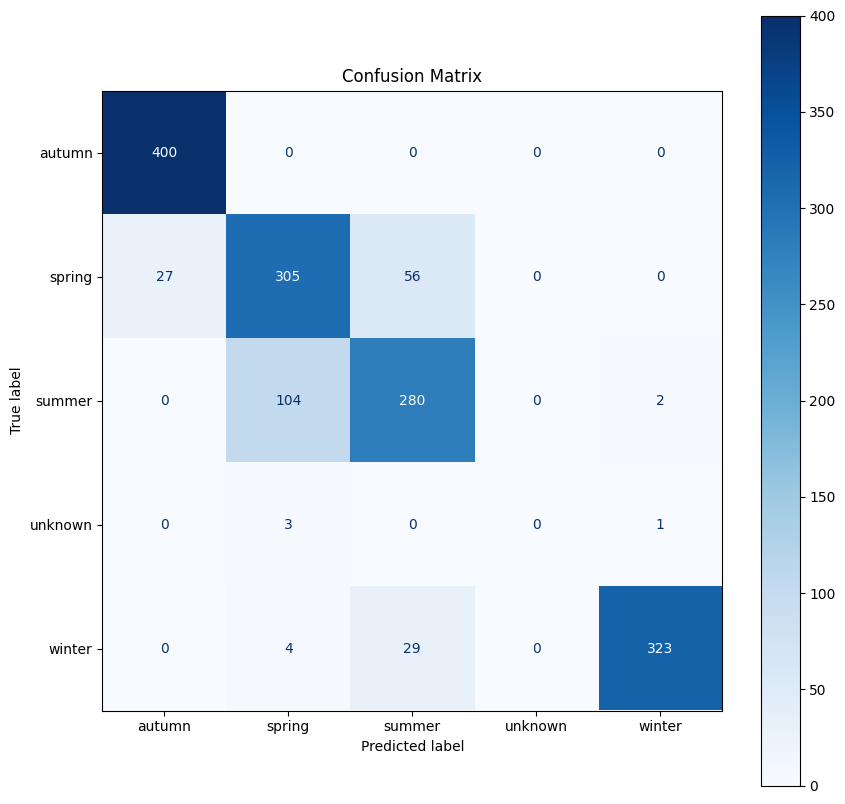

In [32]:
#plotting the matrix
conf_matrix = confusion_matrix(y_test, y_pred) #decoded values
print(f"Confusion Matrix:\n{conf_matrix}")
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=le.classes_) # Use the original labels for display
disp.plot(ax=ax, cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix")
plt.show()

### Decision Tree Model

### Multinomial Logistic Regression Model

### K-Nearest Neighbors Model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
import math
import numpy as geek
import pandas as pd

In [34]:
df.head() #normalized set

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,season_released,profit,covid_year
0,The Shining,6.0,6.0,0.0,1705.0,47.0,1.000000,2589.0,Stephen King,1047.0,54.0,211.0,4974.0,2319.0,78.0,2,3260.0,0.0
1,The Blue Lagoon,6.0,1.0,0.0,1492.0,20.0,0.296985,2269.0,Henry De Vere Stacpoole,327.0,55.0,98.0,5275.0,731.0,35.0,2,3841.0,0.0
2,Star Wars: Episode V - The Empire Strikes Back,4.0,0.0,0.0,1771.0,50.0,1.000000,1111.0,Leigh Brackett,1745.0,55.0,207.0,6622.0,1540.0,56.0,2,4847.0,0.0
3,Airplane!,4.0,4.0,0.0,1492.0,40.0,1.000000,1301.0,Jim Abrahams,2246.0,55.0,87.0,5722.0,1812.0,19.0,2,4202.0,0.0
4,Caddyshack,6.0,4.0,0.0,1543.0,36.0,0.493472,1054.0,Brian Doyle-Murray,410.0,55.0,115.0,4724.0,1777.0,29.0,2,3424.0,0.0


In [35]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

Generating data and labels

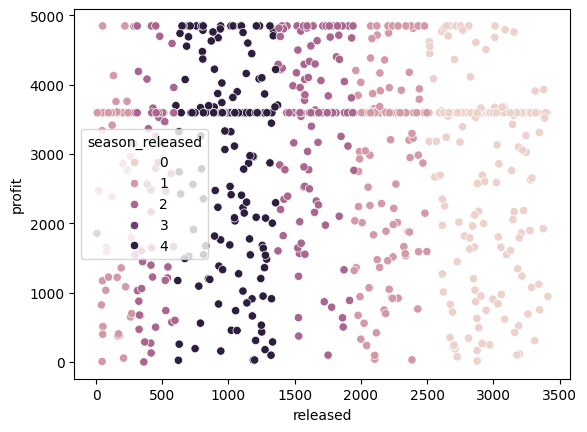

In [36]:
subset = df.sample(n=700)
sns.scatterplot(data = subset, x = subset['released'], y = subset['profit'], hue = subset['season_released'])
rel = subset['released']
prof = subset['profit']
season = subset['season_released']

Split and normalize dataset

In [37]:
X_train, X_test, y_train, y_test = train_test_split(subset[['released', 'profit']], subset['season_released'], test_size=0.33, random_state=0)

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

Fit and evaluating model

<Axes: xlabel='released', ylabel='profit'>

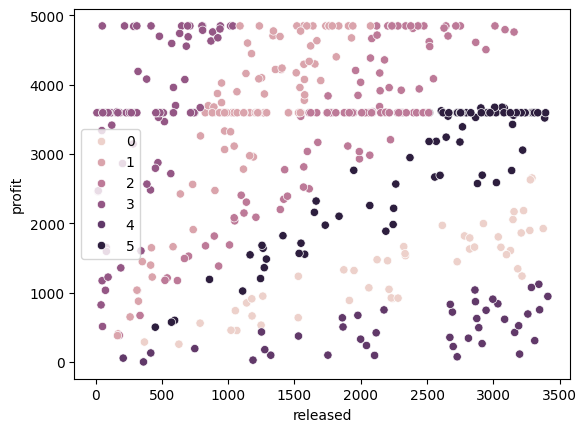

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 6, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

sns.scatterplot(data = X_train, x = 'released', y = 'profit', hue = kmeans.labels_)

Visualize distribution of profits for seasons in boxplot from clusters

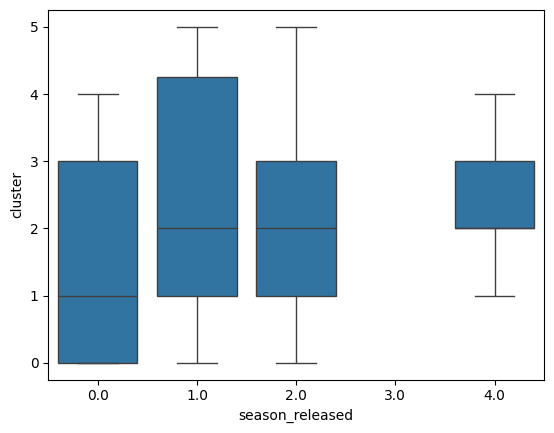

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt


cluster_labels = pd.Series(kmeans.labels_)
y_train_clustered = pd.DataFrame({'y_train': y_train, 'cluster': cluster_labels})

sns.boxplot(x = subset['season_released'], y='cluster', data = y_train_clustered)
plt.show()                                  

Evaluate performance

In [40]:
from sklearn.metrics import silhouette_score
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.55947128124272

Choose best number of clusters

<Axes: xlabel='released', ylabel='profit'>

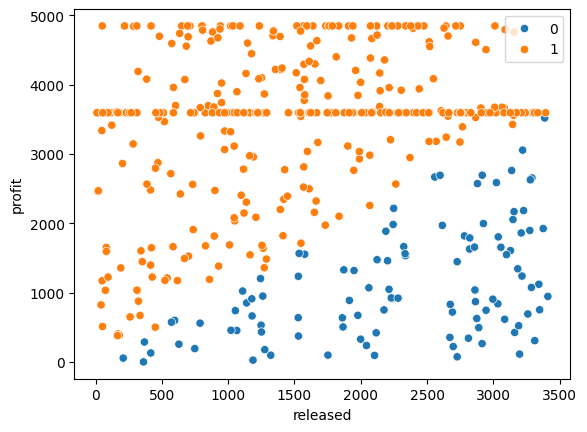

In [41]:
K = range(2, 10)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

plot_data = pd.DataFrame({
    'released': subset['released'],
    'profit': subset['profit'],
})

# Now, plot using the new DataFrame
sns.scatterplot(data=X_train, x='released', y='profit', hue=fits[0].labels_)


<Axes: xlabel='released', ylabel='profit'>

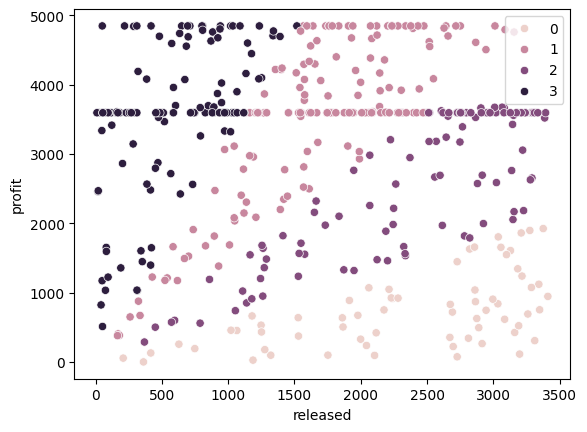

In [42]:
sns.scatterplot(data=X_train, x='released', y='profit', hue=fits[2].labels_)

<Axes: xlabel='released', ylabel='profit'>

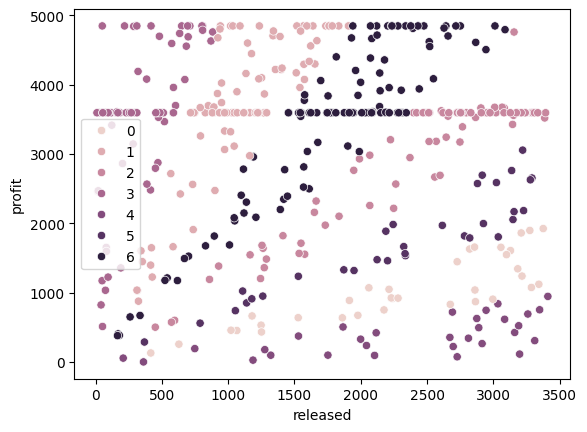

In [43]:
sns.scatterplot(data=X_train, x='released', y='profit', hue=fits[5].labels_)

Determine score for each k valoue

<Axes: >

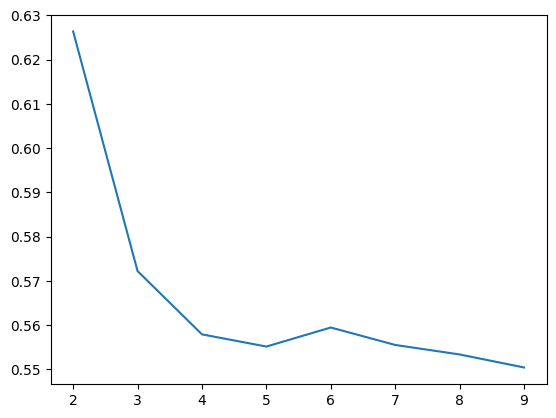

In [44]:
sns.lineplot(x = K, y = score)

Best k value is 8

Silhouette Score for k = 8: 0.553381607875178


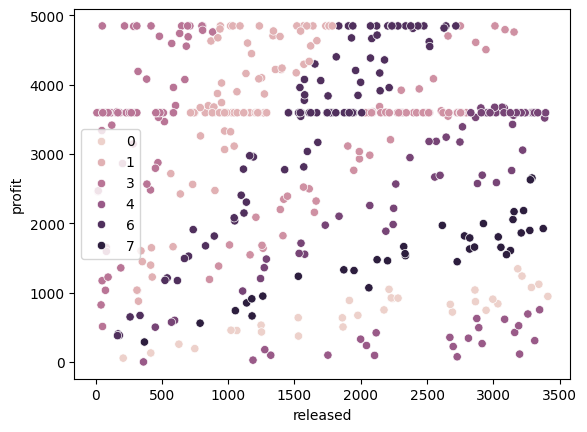

In [45]:
sns.scatterplot(data = X_train, x = 'released', y = 'profit', hue = fits[6].labels_)
print("Silhouette Score for k = 8:", score[6])

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        52
           1       0.95      0.83      0.89        65
           2       0.83      0.90      0.86        59
           3       0.00      0.00      0.00         1
           4       0.93      0.93      0.93        54

    accuracy                           0.90       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.90      0.90      0.90       231

[[52  0  0  0  0]
 [ 4 54  7  0  0]
 [ 0  2 53  0  4]
 [ 0  1  0  0  0]
 [ 0  0  4  0 50]]


C:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


summary

#### Split the dataset into training and testing sets to later evaluate performance

#### Train the model

### Using Autogluon to tell what model works best

In [47]:
from autogluon.tabular import TabularDataset, TabularPredictor
train_data = TabularDataset(data=df)
test_data = TabularDataset(data=df)
predictor = TabularPredictor(label='season_released').fit(train_data, time_limit=200)  # Fit models for 120s
leaderboard = predictor.leaderboard(test_data)

ModuleNotFoundError: No module named 'autogluon'

In [ ]:
leaderboard